In [1]:
import yfinance as yf
import pandas as pd

# Symbols for your portfolio
symbols = ['SPY', 'XLC']

# Fetch historical stock data for each symbol
data = {symbol: yf.download(symbol, start="2020-01-01", end="2024-11-25") for symbol in symbols}

# Initialize an empty dictionary to store 'Adj Close' series
adj_close_data = {}

# Extract 'Adj Close' prices for each symbol
for symbol, df in data.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[symbol] = df['Adj Close']

# Combine the 'Adj Close' data into a single DataFrame
price_data = pd.concat(adj_close_data.values(), axis=1, keys=adj_close_data.keys())

# Drop rows with missing values (if any)
price_data.dropna(inplace=True)

# Display the combined data
print(price_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   SPY        XLC
Date                             
2020-01-02  302.208679  51.972893
2020-01-03  299.920288  51.637638
2020-01-06  301.064514  52.327297
2020-01-07  300.217926  52.394344
2020-01-08  301.817902  52.767902


In [2]:
data.values()


dict_values([                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  323.540009  324.890015  322.529999  324.869995  302.208679   
2020-01-03  321.160004  323.640015  321.100006  322.410004  299.920288   
2020-01-06  320.489990  323.730011  320.359985  323.640015  301.064514   
2020-01-07  323.019989  323.540009  322.239990  322.730011  300.217926   
2020-01-08  322.940002  325.779999  322.670013  324.450012  301.817902   
...                ...         ...         ...         ...         ...   
2024-11-18  586.219971  589.489990  585.340027  588.150024  588.150024   
2024-11-19  584.710022  591.039978  584.030029  590.299988  590.299988   
2024-11-20  590.380005  590.789978  584.630005  590.500000  590.500000   
2024-11-21  593.400024  595.119995  587.450012  593.669983  593.669983   
2024-11-22  593.659973  596.150024  593.150024  595.510010  595.510010   

              Volume  
D

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(price_data)

# Prepare data for CNN-LSTM (time-series format)
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [4]:
scaled_data

array([[0.2398895 , 0.22865138],
       [0.23402397, 0.22295125],
       [0.23695682, 0.2346771 ],
       ...,
       [0.97882822, 1.        ],
       [0.98695341, 0.99574941],
       [0.99166971, 0.99217892]])

In [5]:
# Build and Train the CNN-LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(len(symbols))
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)




Epoch 1/100


c:\Users\mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0854 - val_loss: 0.0087
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3598e-04 - val_loss: 0.0019
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4090e-04 - val_loss: 9.4007e-04
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1564e-04 - val_loss: 9.8397e-04
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9471e-04 - val_loss: 0.0012
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4745e-04 - val_loss: 7.4050e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3893e-04 - val_loss: 7.1773e-04
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3370e-04 - val_loss: 8.5409e-04
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6235e-04 - val_loss: 6.3899e-04
Epoch 12/100
31/31 

In [6]:
# Make predictions
predicted_prices = model.predict(X_test)

# Rescale predictions back to original scale
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices)

# Display the first few predictions
print(predicted_prices_rescaled[:5])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[448.6147    68.41015 ]
 [448.76932   68.139915]
 [447.95398   67.79717 ]
 [453.27097   68.94777 ]
 [454.29016   69.301994]]


In [7]:
pip install cvxpy


Note: you may need to restart the kernel to use updated packages.


In [8]:
import cvxpy as cp
import numpy as np

# Define variables
weights = cp.Variable(len(symbols))
expected_returns = np.mean(predicted_prices_rescaled, axis=0)
covariance_matrix = np.cov(predicted_prices_rescaled, rowvar=False)

# Define objective function (maximize returns)
objective = cp.Maximize(expected_returns @ weights)

# Define constraints
constraints = [
    cp.sum(weights) == 1,
    weights >= 0
]

# Solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve()

optimal_weights = weights.value


In [9]:
optimal_weights

array([9.99999995e-01, 4.87976646e-09])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
   Actual_SPY  Predicted_SPY  Actual_XLC  Predicted_XLC
0  450.507965     448.614685   68.148170      68.410149
1  448.692566     448.769318   67.970108      68.139915
2  452.116241     447.953979   69.394608      67.797173
3  454.059967     453.270966   69.721054      68.947769
4  455.826050     454.290161   69.186867      69.301994


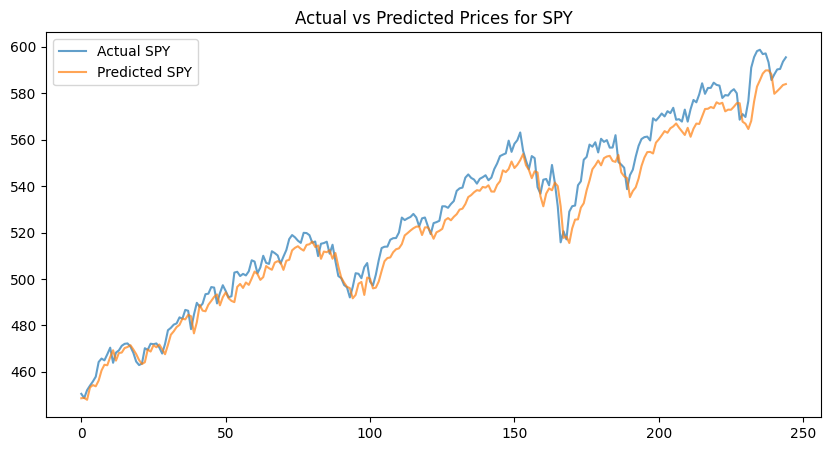

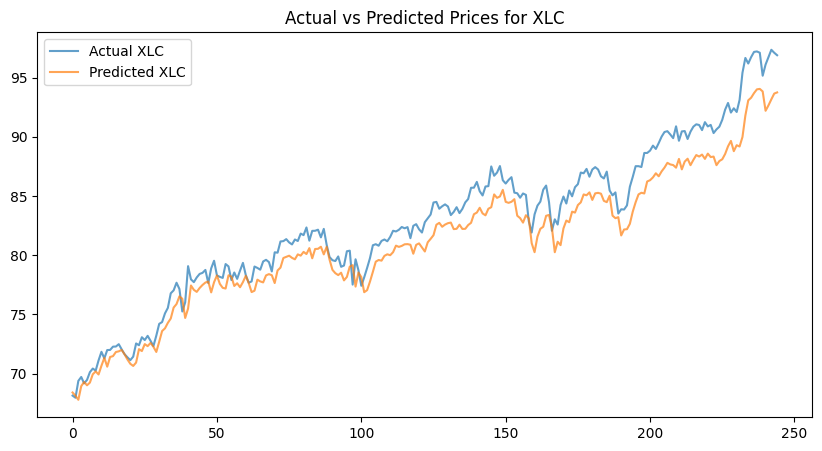

In [10]:
import matplotlib.pyplot as plt

# Make predictions using the test dataset
predicted_prices = model.predict(X_test)

# Rescale predictions and actual values back to original price scale
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices)
y_test_rescaled = scaler.inverse_transform(y_test)

# Convert results to DataFrame for better comparison
comparison_df = pd.DataFrame({
    'Actual_SPY': y_test_rescaled[:, 0],
    'Predicted_SPY': predicted_prices_rescaled[:, 0],
    'Actual_XLC': y_test_rescaled[:, 1],
    'Predicted_XLC': predicted_prices_rescaled[:, 1]
})

# Display the first few rows of actual vs. predicted
print(comparison_df.head())

# Plot actual vs. predicted for SPY
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual_SPY'], label='Actual SPY', alpha=0.7)
plt.plot(comparison_df['Predicted_SPY'], label='Predicted SPY', alpha=0.7)
plt.title('Actual vs Predicted Prices for SPY')
plt.legend()
plt.show()

# Plot actual vs. predicted for XLC
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual_XLC'], label='Actual XLC', alpha=0.7)
plt.plot(comparison_df['Predicted_XLC'], label='Predicted XLC', alpha=0.7)
plt.title('Actual vs Predicted Prices for XLC')
plt.legend()
plt.show()


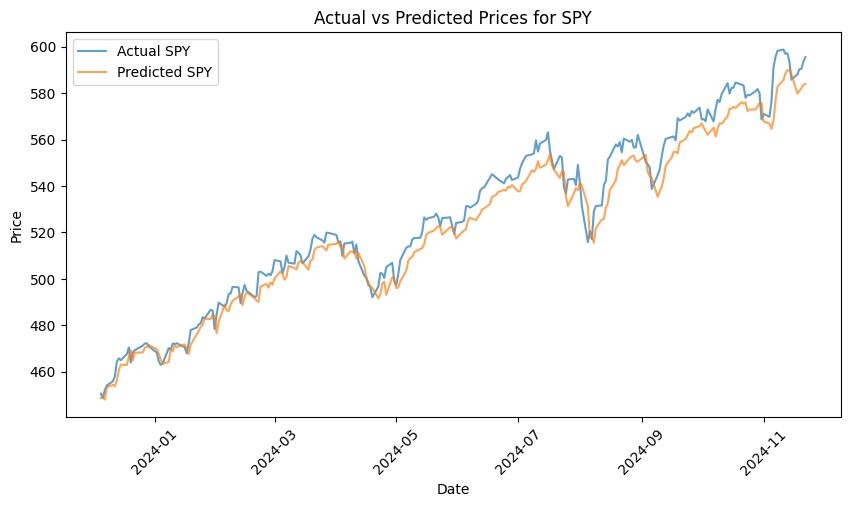

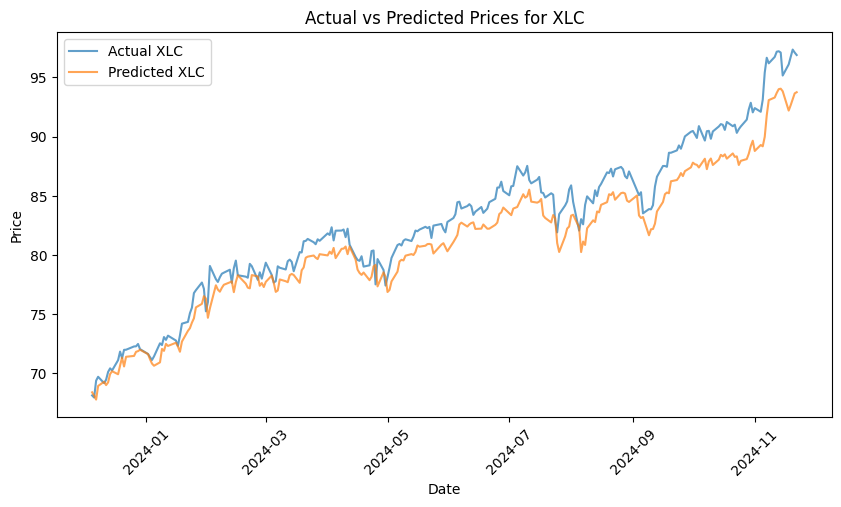

In [11]:
# Get the corresponding dates for the test set
test_dates = price_data.index[-len(y_test):]  # Assuming `price_data` contains original dates

# Plot actual vs. predicted for SPY with dates
plt.figure(figsize=(10, 5))
plt.plot(test_dates, comparison_df['Actual_SPY'], label='Actual SPY', alpha=0.7)
plt.plot(test_dates, comparison_df['Predicted_SPY'], label='Predicted SPY', alpha=0.7)
plt.title('Actual vs Predicted Prices for SPY')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Plot actual vs. predicted for XLC with dates
plt.figure(figsize=(10, 5))
plt.plot(test_dates, comparison_df['Actual_XLC'], label='Actual XLC', alpha=0.7)
plt.plot(test_dates, comparison_df['Predicted_XLC'], label='Predicted XLC', alpha=0.7)
plt.title('Actual vs Predicted Prices for XLC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [12]:
# Generate predictions using the test dataset
predicted_prices = model.predict(X_test)

# Rescale predictions back to the original price scale
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices)

# Ensure the variable is properly defined before using it
print(predicted_prices_rescaled[:5])  # Check the first few predictions


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[448.6147    68.41015 ]
 [448.76932   68.139915]
 [447.95398   67.79717 ]
 [453.27097   68.94777 ]
 [454.29016   69.301994]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Predicted Prices for the Next 5 Days:
                   SPY        XLC
Date                             
2024-11-23  583.988953  93.740891
2024-11-24  574.359863  91.247093
2024-11-25  565.738159  89.009659
2024-11-26  556.969360  86.942581
2024-11-27  548.785522  84.919533


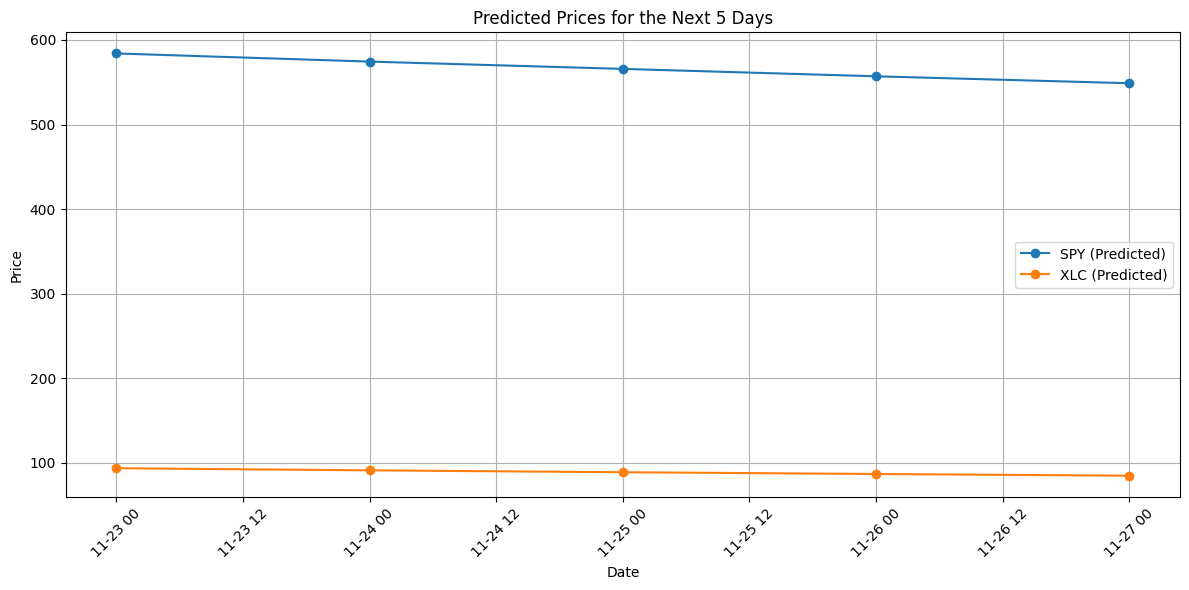

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Prepare data for 5-day prediction
future_predictions = []
current_input = X_test[-1:]  # Start with the last window of the test dataset

# Extract the last available date from the test dataset
last_date = price_data.index[-1]  # Ensure price_data.index is a datetime index
future_dates = [last_date + timedelta(days=i) for i in range(1, 6)]  # Generate next 5 dates

# Sequentially predict 5 days into the future
for _ in range(5):
    # Predict the next day
    next_prediction = model.predict(current_input)
    # Rescale prediction back to original scale
    next_prediction_rescaled = scaler.inverse_transform(next_prediction)
    future_predictions.append(next_prediction_rescaled[0])

    # Update input for the next step (remove the first day and add the new prediction)
    next_step = np.append(current_input[:, 1:, :], next_prediction.reshape(1, 1, -1), axis=1)
    current_input = next_step

# Convert predictions to a NumPy array for convenience
future_predictions = np.array(future_predictions)

# Create a DataFrame for predicted prices with dates
predicted_df = pd.DataFrame(
    future_predictions, columns=['SPY', 'XLC'], index=future_dates
)
predicted_df.index.name = 'Date'

# Display the predicted prices
print("\nPredicted Prices for the Next 5 Days:")
print(predicted_df)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(predicted_df.index, predicted_df['SPY'], label='SPY (Predicted)', marker='o')
plt.plot(predicted_df.index, predicted_df['XLC'], label='XLC (Predicted)', marker='o')
plt.title('Predicted Prices for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
current_input = X_test[-10:]  # Use a longer sequence for prediction
